In [1]:
import numpy as np
import pandas as pd
import warnings
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from re import sub

warnings.filterwarnings('ignore')

In [2]:
# model packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from scipy.optimize import minimize

In [3]:
df_clean = pd.read_csv('data/cleanData.csv')
df_clean['zipcode'] = df_clean['zipcode'].astype('category')

In [4]:
# one-hot for categorical column (>= 3 categories)
to_categorical = ['zipcode', 'property_type', 'room_type', 'bed_type', 'peak_month']


df_final = pd.concat([df_clean, pd.get_dummies(df_clean[to_categorical],
                                              prefix=['zipcode_', 'propertyType_', 'roomType_', 'bedType_', 'peakMonth_'], 
                                              drop_first=True)], axis = 1)

In [5]:
not_features = ['listing_id','date','unavailable','dayWeek','month','host_since','city', 'year', 'day'] + to_categorical

In [6]:
X = df_final.drop(not_features, axis = 1)
Y = df_final['unavailable']

The features we have:
- price_daily
- pull distance (how far the date is from the time pulling the data)
- host info: host_length (when doing optimization for new hosts, set 0)
- time info: weekend, peak_month
- property info: zipcode, property type, room type, bed type, acommodates, bathrooms, bedrooms, beds, guests_included, extra_people
- related fees info: security_deposit, cleaning_fee

## Predictive Model (The probability of getting rent)

In this predictive model, we are finding the mapping for (price, other variables) to (the probability of getting rent)

The probability of Being Rent is 0.64


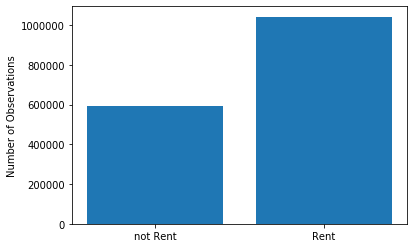

In [9]:
# Data Balance check
plt.bar([1,2], [len(Y)-np.sum(Y), np.sum(Y)])
plt.xticks([1,2], ['not Rent', 'Rent'])
plt.ylabel('Number of Observations');
print('The probability of Being Rent is {0:4.2f}'.format(np.sum(Y)/len(Y)))

From the plot above we can see that, the data does not have a severe imbalance problem in response variable, so we do not need to take further actions.

1. Train-Test Split

In [10]:
X_TRAIN, X_test, Y_TRAIN,  y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2019)
X_train, X_val, y_train,  y_val = train_test_split(X_TRAIN, Y_TRAIN, test_size = 0.2, random_state = 2019)

print('# Training Images: {}'.format(len(X_train)))
print('# Validation Images: {}'.format(len(X_val)))
print('# Test Images: {}'.format(len(X_test)))

# Training Images: 1178120
# Validation Images: 294530
# Test Images: 163628


2. Logistic Regression (with built-in cross validation for selecting Cs values and l1_ratios)

In [ ]:
k = KFold(5, random_state = 2019, shuffle=True)
clf = LogisticRegressionCV(cv = k, random_state = 2019).fit(X_TRAIN, Y_TRAIN)

In [ ]:
print('The accuracy for Logistic Regression on Test set is {0:6.4f}'.format(clf.score(X_test, y_test)))

3. KNN (with cross validation for selecting n_neighbors)

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(10, 2, 1)}
knn_gscv = GridSearchCV(knn, param_grid, cv = k)
knn_gscv.fit(X_TRAIN, Y_TRAIN)

In [ ]:
# print('The best n_neighbors for KNN is {}'.format(knn_gscv.best_params))
print('The accuracy for KNN on Test set is {0:6.4f}'.format(knn_gscv.score(X_test, y_test)))

4. LDA/QDA

5. Decision Trees

6. Random Forest

7. Boosting (XGBoost)